# PySpice Installation Manual

## Electric and Electronic Circuits

**Authors: Sania Dolat, Ali Saadatpour**

### Fall 2024

This document focuses on the installation of the PySpice library. Various methods are available for installing this library, ensuring the inclusion of numerous components such as diodes and MOSFETs. It is crucial that this library is installed correctly; otherwise, numerous issues may arise. Therefore, it is highly recommended to follow the steps outlined in this document.


## Installation Using Repository

To install the library, download it from the repository or copy the link into your browser. Then follow the instructions to download, extract, and install using Python's pip.

**Repository Links:**
- [PySpice Github Repository](https://github.com/PySpice-org/PySpice)
- [Direct Download Zip](https://github.com/PySpice-org/PySpice/archive/refs/heads/master.zip)

**Installation Commands:**  
In the next step, using the command below, we navigate to that path using our Python package manager and install it. Open CMD and enter the following command.

In [ ]:
pip install --target="C:\Program Files\PySpice-master" PySpice
pip3 install PySpice
# Note : Before excuting this command above , please Remove exclamation mark.

If you notice, Python uses cached data. (It's the same package that we downloaded from the repository.)

## Update Path Instructions
  If you have extracted the Zip file to a different path, update the command above to suit your preferred path.


### Note 

In the next step, add this to the system path as well , Follow the steps below according to the image.


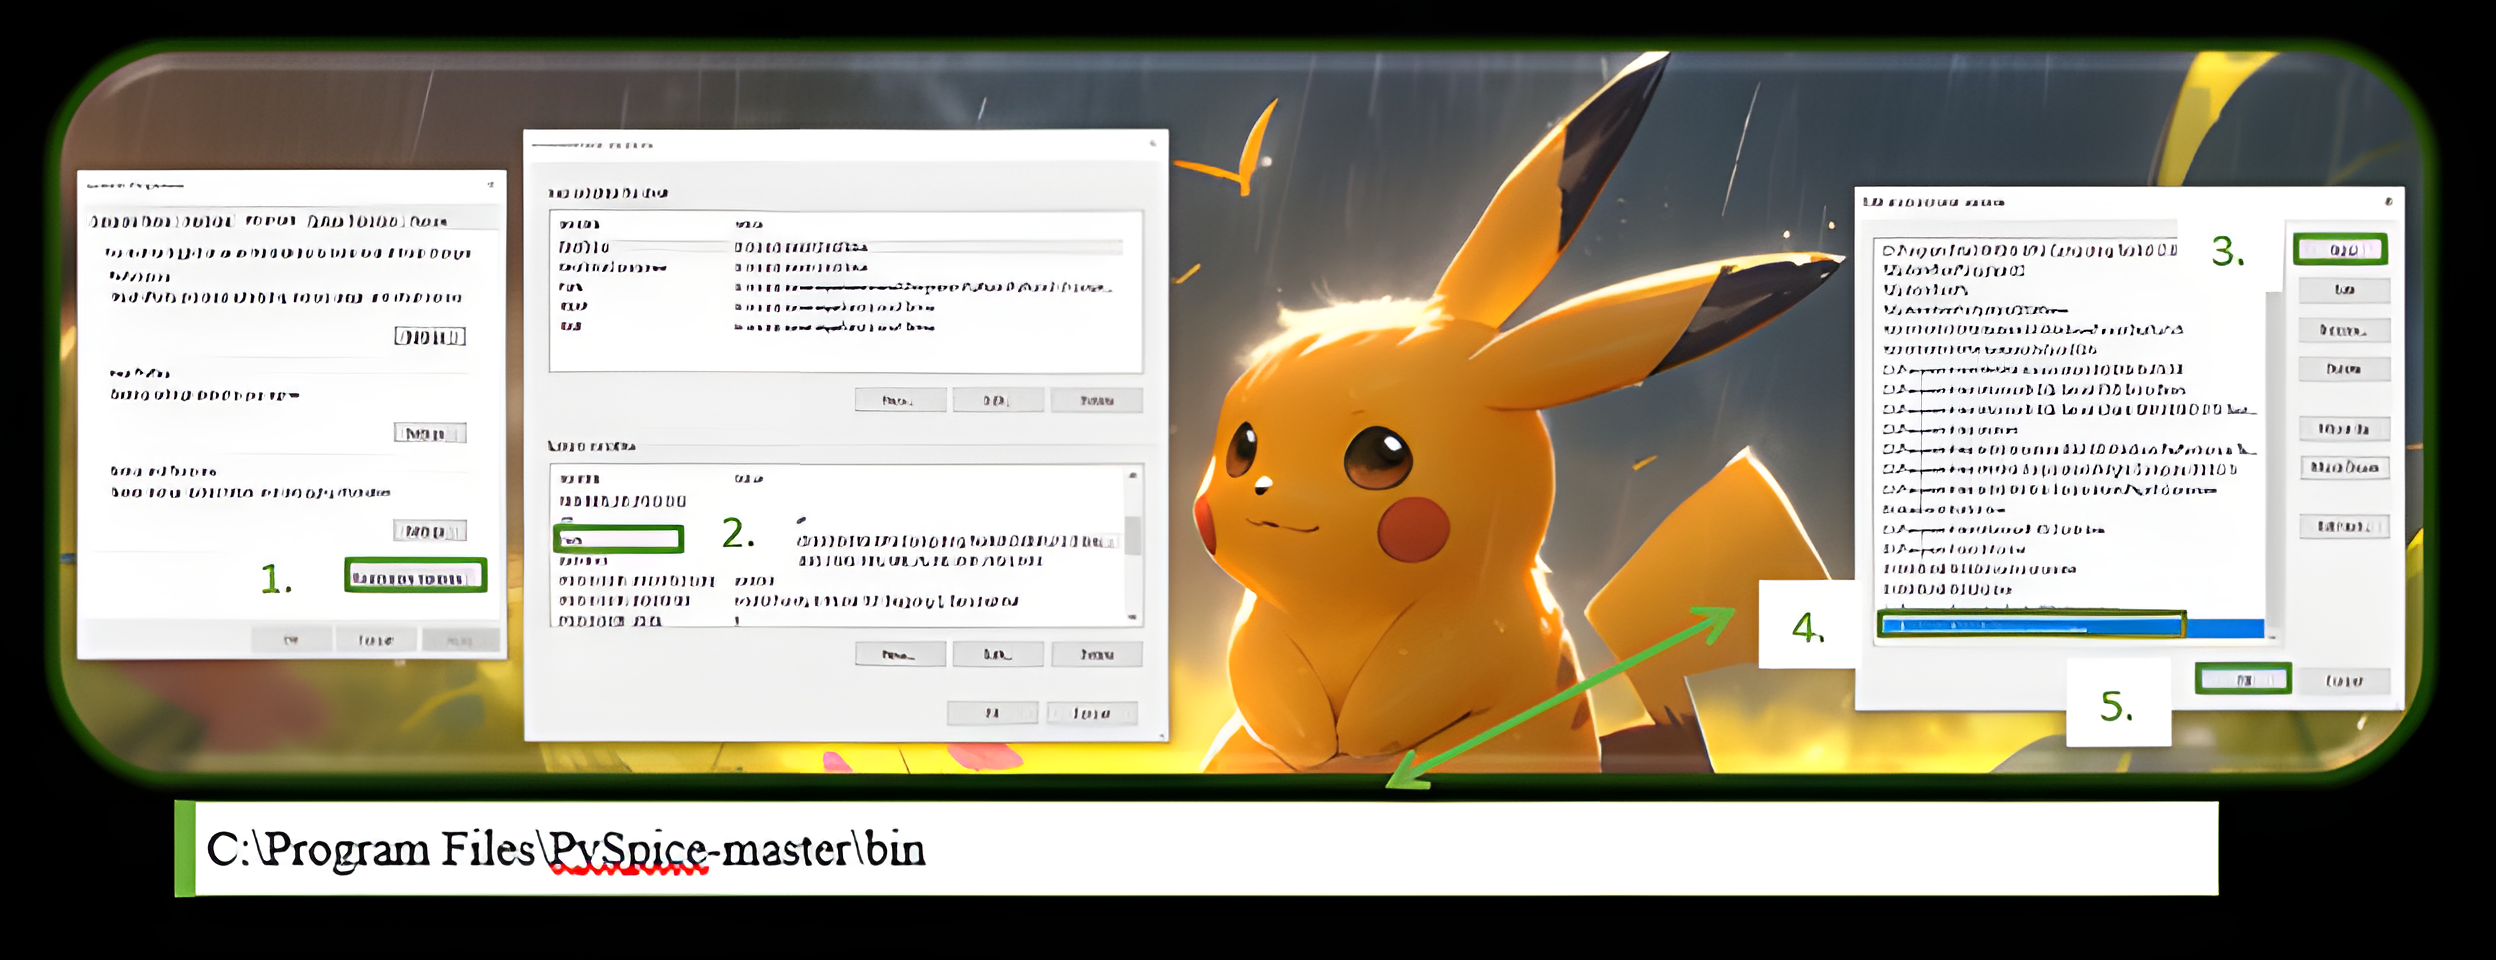

Again !! If you have extracted the Zip file to a different path, update the command above to suit your preferred path.

## Verification of Installation

Check if Python recognizes the PySpice package by using the following command in Command Prompt:

**Verification Command:**


In [ ]:
pip show PySpice

## Result
The output of the command above is as follows:


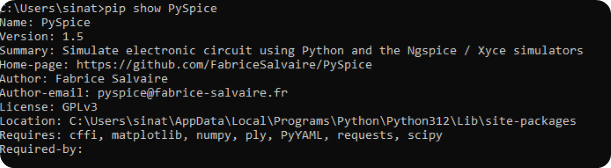

And also, for added assurance, run the following command inside a Python file:

In [1]:
import PySpice.Spice.Simulation as simulation
print(dir(simulation))

['ACAnalysisParameters', 'AcSensitivityAnalysisParameters', 'AnalysisParameters', 'CircuitSimulation', 'CircuitSimulator', 'ConfigInstall', 'DCAnalysisParameters', 'DcSensitivityAnalysisParameters', 'DistortionAnalysisParameters', 'MeasureParameters', 'NoiseAnalysisParameters', 'OperatingPointAnalysisParameters', 'PoleZeroAnalysisParameters', 'TransferFunctionAnalysisParameters', 'TransientAnalysisParameters', 'Unit', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_module_logger', 'as_A', 'as_Degree', 'as_Hz', 'as_V', 'as_s', 'join_dict', 'join_list', 'logging', 'os', 'str_spice', 'u_Degree']


## Handling Installation Errors

If you encounter an error, it might be due to a missing DLL file within the installed Python packages. Follow the link below to download the required DLL and follow the outlined steps to resolve the issue.

**DLL Download Link:**
- [ngspice_x86-64 DLL File](https://www.dropbox.com/scl/fi/6qguzxdrcgz4bsmugolzg/ngspice_x86-64.zip?rlkey=ilt2u17l25mlk9nuab4999yg3&st=exupnbrh&dl=0)


### After downloading

follow the path below:

C:\Users\<ur_local_username>\AppData\Local\Programs\Python\Python312\Lib\site-packages

## Comment
Replace <ur_local_username> with your local username. In the opened folder, create a folder named Spice64_dll and open it. Then again, in the opened folder, create a folder named dll-vs and open it. Inside this folder, extract the file ngspice_x86-64.zip (the file placed in Dropbox)."

After completing these installation steps, you can perform an example. Let's do the following example:

C:\Users\sinat\AppData\Local\Temp\ipykernel_19200\4100308016.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


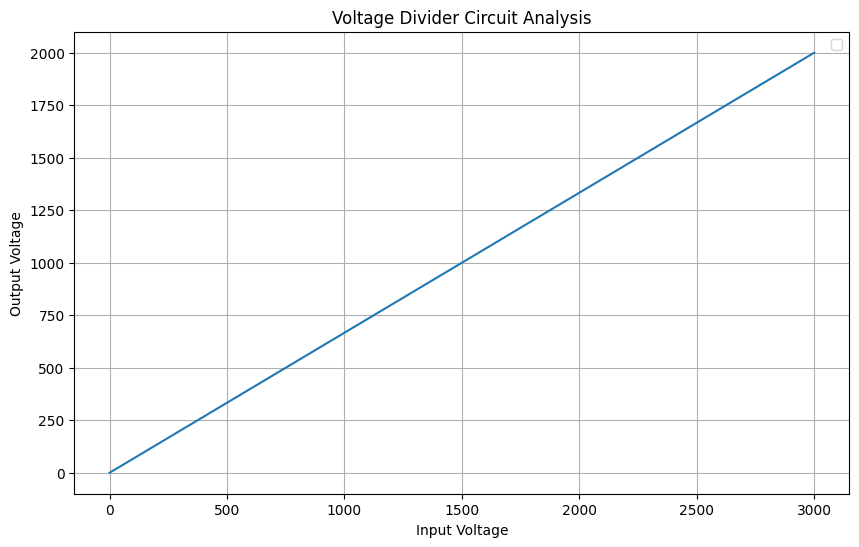

In [3]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.HighLevelElement import SinusoidalVoltageSource 
from PySpice.Unit import *
import matplotlib.pyplot as plt
from PySpice.Spice.Library import SpiceLibrary
import numpy as np


dc_offset = 1@u_V
ac_amplitude = 100@u_mV

# Create a circuit
circuit = Circuit('RC Circuit')
#SinusoidalVoltageSource('input', circuit.gnd, 'input',circuit.gnd)
#source = circuit.V('input', 'in', circuit.gnd, dc_offset)
#SinusoidalVoltageSource('input','input',circuit.gnd)
#AcLine()
#('input', circuit.gnd, 'L', rms_voltage=230@u_V, frequency=50@u_Hz)
source=circuit.V(50, 'input', circuit.gnd, 1000 )#@ u_V)
circuit.R(1, 'input', 'output', 1 @ u_kΩ)
circuit.R(2, 'output', circuit.gnd, 2 @ u_kΩ)
#circuit.SinusoidalVoltageSource('input', 'input', circuit.gnd, amplitude=220, frequency=50)
# Simulate the circuit

InputData=np.array([])
OutputData=np.array([])

for voltage in (0,100,3000):
    source.dc_value = voltage
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    #analysis = simulator.transient(step_time=0.01 @ u_ms, end_time=50 @ u_ms)
    InputData=np.append(InputData,analysis['input'])
    OutputData=np.append(OutputData,analysis['output'])

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(InputData,OutputData)

# Add labels and legend
plt.xlabel('Input Voltage')
plt.ylabel('Output Voltage')
plt.title('Voltage Divider Circuit Analysis')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()